In [1]:
import sidetable
import pandas as pd
pd.set_option('display.max_columns', 500)

import missingno as msno

In [2]:
import pandas as pd
import sidetable

df = pd.read_csv('https://github.com/chris1610/pbpython/blob/master/data/school_transform.csv?raw=True', index_col=0)

In [3]:
df.head()

,School Name,City,State,District Name,Model Selected,Award_Amount,Region
0,HOGARTH KINGEEKUK MEMORIAL SCHOOL,SAVOONGA,AK,BERING STRAIT SCHOOL DISTRICT,Transformation,471014,West
1,AKIACHAK SCHOOL,AKIACHAK,AK,YUPIIT SCHOOL DISTRICT,Transformation,520579,West
2,GAMBELL SCHOOL,GAMBELL,AK,BERING STRAIT SCHOOL DISTRICT,Transformation,449592,West
3,BURCHELL HIGH SCHOOL,WASILLA,AK,MATANUSKA-SUSITNA BOROUGH SCHOOL DISTRICT,Transformation,641184,West
4,AKIAK SCHOOL,AKIAK,AK,YUPIIT SCHOOL DISTRICT,Transformation,399686,West


In [27]:
import numpy as np
df['random']  = np.random.choice([-1,0,1],len(df))

# base

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 757 entries, 0 to 830
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   School Name     757 non-null    object
 1   City            757 non-null    object
 2   State           757 non-null    object
 3   District Name   757 non-null    object
 4   Model Selected  757 non-null    object
 5   Award_Amount    757 non-null    int64 
 6   Region          747 non-null    object
dtypes: int64(1), object(6)
memory usage: 47.3+ KB


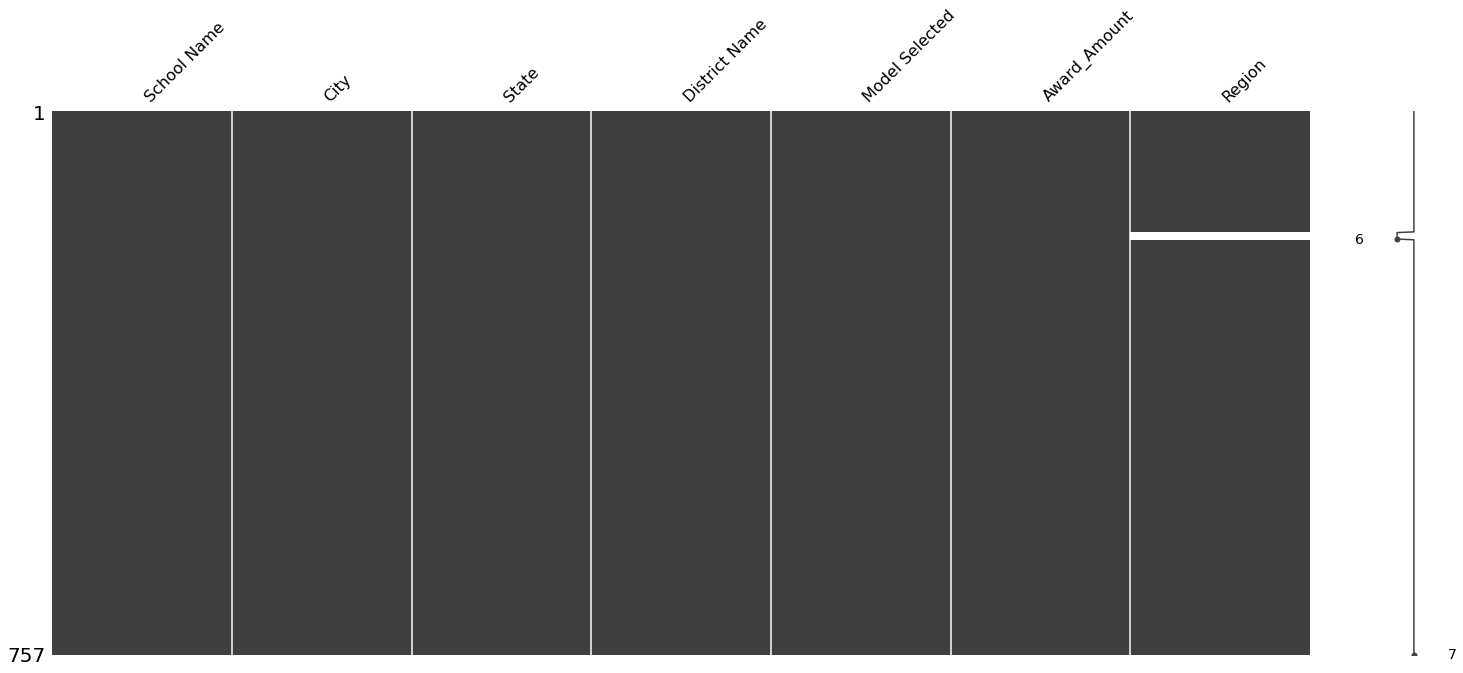

In [5]:
msno.matrix(df);

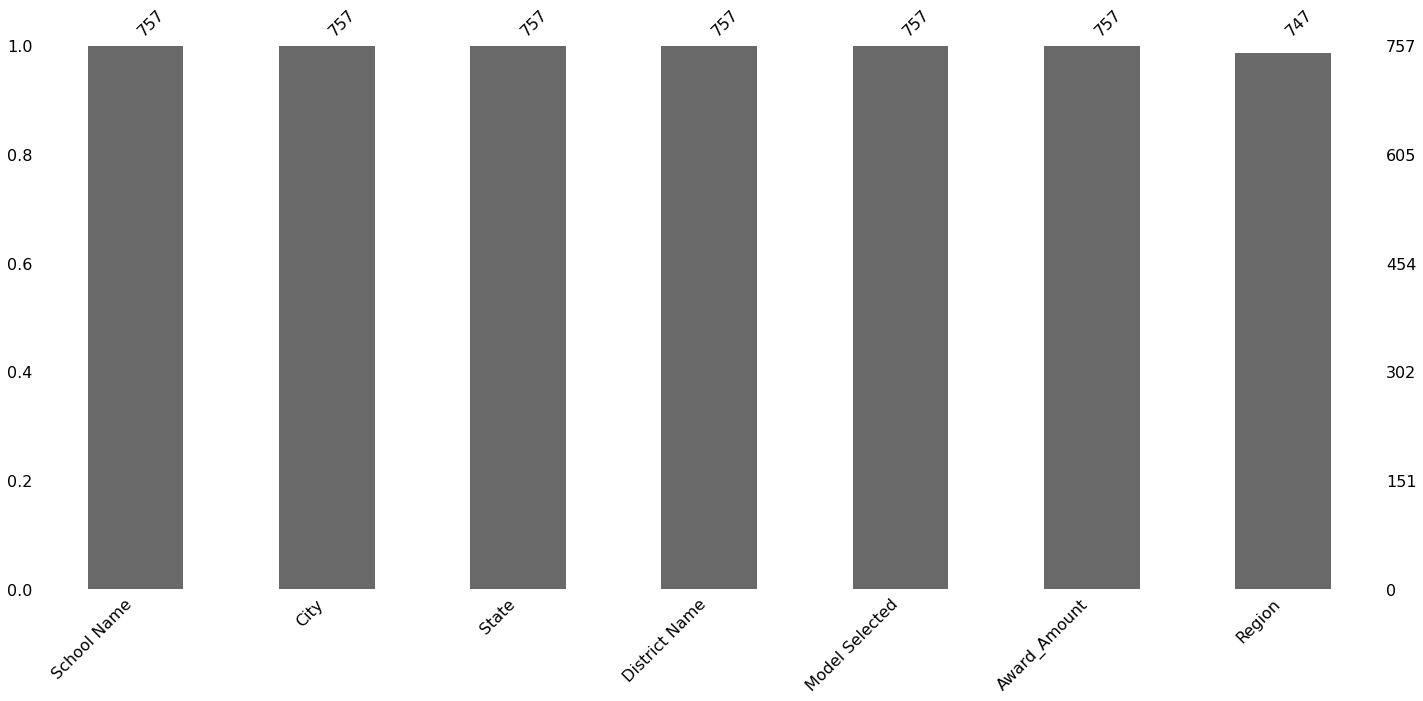

In [6]:
msno.bar(df);

In [7]:
na_df = (X.isnull().sum()/len(X)) * 100
na_df = na_df.drop(na_df[na_df==0].index).sort_values(ascending=False)
f, ax = plt.subplots(figsize=(12,8))
sns.barplot(x=na_df.index, y=na_df)
plt.xticks(rotation="90")

NameError: name 'X' is not defined

In [ ]:
pd.options.plotting.backend = "plotly"

df_missing = df.isnull().sum().reset_index()
df_missing.columns = ['col', 'miss_cnt']
df_missing = df_missing.sort_values('miss_cnt', ascending=True)

df_missing.plot.bar(y = 'col', x = 'miss_cnt', orientation='h')

In [8]:
df.nunique()

School Name       748
City              382
State              46
District Name     372
Model Selected      4
Award_Amount      631
Region              4
dtype: int64

In [9]:
df.select_dtypes(exclude=['object']).describe().round(decimals=2)

,Award_Amount
count,757.00
mean,421401.85
std,286625.44
min,10000.00
25%,162541.00
50%,407794.00
75%,671142.00
max,997852.00


In [10]:
df.select_dtypes(include=['object']).describe().round(decimals=2)

,School Name,City,State,District Name,Model Selected,Region
count,757,757,757,757,757,747
unique,748,382,46,372,4,4
top,NORTHWEST MIDDLE,PHILADELPHIA,CA,PHILADELPHIA CITY SD,Transformation,South
freq,2,29,92,27,543,243


In [13]:
categorical_columns = [c for c in df.columns if df[c].dtype.name == 'object']

In [14]:
data_describe = df.describe(include=['object'])

In [15]:
binary_columns = [c for c in categorical_columns if data_describe[c]['unique'] == 2]

In [16]:
df.describe()

,Award_Amount
count,757.000000
mean,421401.850727
std,286625.443068
min,10000.000000
25%,162541.000000
50%,407794.000000
75%,671142.000000
max,997852.000000


In [31]:
df.describe().min()[df.describe().min() < 0]

random   -1.0
dtype: float64

# stb

In [32]:
df.stb.missing(style=True)

,missing,total,percent
Region,10,757,1.32%
School Name,0,757,0.00%
City,0,757,0.00%
State,0,757,0.00%
District Name,0,757,0.00%
Model Selected,0,757,0.00%
Award_Amount,0,757,0.00%
random,0,757,0.00%


In [53]:
df.stb.freq(['State'], style=True)
# df["State"].value_counts(normalize = True) # the same

,State,count,percent,cumulative_count,cumulative_percent
0,CA,92,12.15%,92,12.15%
1,FL,71,9.38%,163,21.53%
2,PA,58,7.66%,221,29.19%
3,OH,35,4.62%,256,33.82%
4,MO,32,4.23%,288,38.04%
5,MI,28,3.70%,316,41.74%
6,GA,26,3.43%,342,45.18%
7,NY,25,3.30%,367,48.48%
8,NC,23,3.04%,390,51.52%
9,SC,19,2.51%,409,54.03%


In [52]:
df.stb.freq(['State'], thresh=50, style=True, 
#             other_label='Rest'
           )

,State,count,percent,cumulative_count,cumulative_percent
0,CA,92,12.15%,92,12.15%
1,FL,71,9.38%,163,21.53%
2,PA,58,7.66%,221,29.19%
3,OH,35,4.62%,256,33.82%
4,MO,32,4.23%,288,38.04%
5,MI,28,3.70%,316,41.74%
6,GA,26,3.43%,342,45.18%
7,NY,25,3.30%,367,48.48%
8,others,390,51.52%,757,100.00%


In [51]:
df.stb.freq(['Region', 'Model Selected'], style=True) # group columns

,Region,Model Selected,count,percent,cumulative_count,cumulative_percent
0,South,Transformation,185,24.77%,185,24.77%
1,West,Transformation,142,19.01%,327,43.78%
2,Midwest,Transformation,111,14.86%,438,58.63%
3,Northeast,Transformation,102,13.65%,540,72.29%
4,West,Turnaround,49,6.56%,589,78.85%
5,South,Turnaround,44,5.89%,633,84.74%
6,Midwest,Turnaround,43,5.76%,676,90.50%
7,Northeast,Turnaround,25,3.35%,701,93.84%
8,South,Restart,11,1.47%,712,95.31%
9,Northeast,Restart,9,1.20%,721,96.52%


In [50]:
df.stb.freq(['Region'], value='Award_Amount', style=True)

,Region,Award_Amount,percent,cumulative_Award_Amount,cumulative_percent
0,South,"117,467,481",37.31%,"117,467,481",37.31%
1,West,"74,418,552",23.64%,"191,886,033",60.95%
2,Midwest,"65,736,175",20.88%,"257,622,208",81.84%
3,Northeast,"57,179,654",18.16%,"314,801,862",100.00%


In [49]:
# expanded version of a crosstab
df.stb.freq(['Region', 'Model Selected'],
             value='Award_Amount', thresh=82,
             other_label='Remaining', style=True)

,Region,Model Selected,Award_Amount,percent,cumulative_Award_Amount,cumulative_percent
0,South,Transformation,"88,680,032",28.17%,"88,680,032",28.17%
1,West,Transformation,"56,207,890",17.86%,"144,887,922",46.03%
2,Midwest,Transformation,"48,702,505",15.47%,"193,590,427",61.50%
3,Northeast,Transformation,"41,263,161",13.11%,"234,853,588",74.60%
4,South,Turnaround,"22,531,412",7.16%,"257,385,000",81.76%
5,Remaining,Remaining,"57,416,862",18.24%,"314,801,862",100.00%


In [48]:
pd.crosstab(df['Region'], df['Model Selected'], values=df['Award_Amount'], aggfunc='sum')

Model Selected,Closure,Restart,Transformation,Turnaround
Region,,,,
Midwest,86872,1397735,48702505,15549063
Northeast,508773,5728010,41263161,9679710
South,354323,5901714,88680032,22531412
West,272520,2245146,56207890,15692996


In [19]:
df.groupby('Model Selected').agg({'Award_Amount': ['mean', 'sum', 'count']})

Award_Amount                 
                         mean        sum count
Model Selected                                
Closure          76405.500000    1222488    16
Restart         503412.424242   16612610    33
Transformation  434805.963168  236099638   543
Turnaround      394342.212121   65066465   165

# corr

In [144]:
from sklearn.datasets import load_iris
import pandas as pd
iris = load_iris(as_frame=True,return_X_y=False)

df = iris['data']

In [155]:
c = df.corr().abs()
s = c.unstack()
so = s.sort_values(kind="quicksort", ascending=False)
pd.DataFrame(so[(so.values!=1) & (so.values > 0.1)], columns = ['corr'])#.reset_index()

corr
petal width (cm)  petal length (cm)  0.962865
petal length (cm) petal width (cm)   0.962865
                  sepal length (cm)  0.871754
sepal length (cm) petal length (cm)  0.871754
petal width (cm)  sepal length (cm)  0.817941
sepal length (cm) petal width (cm)   0.817941
petal length (cm) sepal width (cm)   0.428440
sepal width (cm)  petal length (cm)  0.428440
petal width (cm)  sepal width (cm)   0.366126
sepal width (cm)  petal width (cm)   0.366126
                  sepal length (cm)  0.117570
sepal length (cm) sepal width (cm)   0.117570

# other